In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sheet_names = ['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007']
sheets_dict = pd.read_excel("../Resources/Raw Data/2007-2023-PIT-Counts-by-State.xlsb", sheet_name=sheet_names, engine='pyxlsb')

In [4]:
common_columns = set(sheets_dict[sheet_names[0]].columns)
for sheet_name in sheet_names[1:]:
    common_columns.intersection_update(sheets_dict[sheet_name].columns)

common_columns = list(common_columns)

In [5]:
for year, df in sheets_dict.items():
    sheets_dict[year] = df[common_columns].copy()

In [6]:
for year, df in sheets_dict.items():
    df['Year'] = int(year)  

combined_df = pd.concat(sheets_dict.values(), ignore_index=True)

In [7]:
combined_df = combined_df[~combined_df['State'].isin(['MP', 'AS', 'PR', 'VI', 'GU', 'AK', 'DC', 'HI', 'Total'])]
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')
combined_df.dropna(subset=['Year'], inplace=True)
combined_df['Year'] = combined_df['Year'].astype(int)

In [8]:
combined_df.reset_index(drop=True, inplace=True)

In [9]:
combined_df.drop([48, 49], axis=0, inplace=True)
combined_df.reset_index(drop=True, inplace=True)

In [10]:
combined_df.dtypes

Unsheltered Homeless Individuals                     object
Sheltered Total Homeless                             object
Sheltered Total Homeless Family Households           object
Overall Homeless                                     object
Overall Homeless Veterans                            object
Sheltered ES Homeless People in Families             object
Sheltered Total Homeless People in Families          object
Unsheltered Homeless Veterans                        object
Sheltered ES Homeless Individuals                    object
Number of CoCs                                      float64
Sheltered Total Homeless Individuals                 object
Unsheltered Homeless People in Families              object
Sheltered TH Homeless Family Households              object
Sheltered ES Homeless Family Households              object
Sheltered TH Homeless                                object
Unsheltered Homeless Family Households               object
Sheltered ES Homeless                   

In [11]:
null_values = combined_df.isnull().any()
null_values_found = False
for column, has_null in null_values.items():
    if has_null:
        null_values_found = True
        print(f"Column '{column}' has {combined_df[column].isnull().sum()} null values.")
if not null_values_found:
    print("No NULL values in dataframe.")

No NULL values in dataframe.


In [12]:
cols = combined_df.columns.difference(['State'])
combined_df[cols] = combined_df[cols].apply(pd.to_numeric, errors='coerce')



In [13]:
columns_to_remove = [
    'Unsheltered Homeless Veterans',
    'Unsheltered Homeless Individuals',
    'Unsheltered Homeless Family Households',
    'Unsheltered Chronically Homeless Individuals',
    'Unsheltered Homeless People in Families'
]

combined_df_cleaned = combined_df.drop(columns=columns_to_remove)

In [13]:
combined_df

,Unsheltered Homeless Veterans,Sheltered ES Homeless,Unsheltered Homeless People in Families,Sheltered Total Homeless Family Households,Sheltered Total Homeless Veterans,Sheltered TH Homeless Family Households,Overall Homeless Veterans,Sheltered Total Homeless,State,Unsheltered Homeless,...,Overall Homeless Family Households,Overall Homeless Individuals,Sheltered ES Homeless People in Families,Unsheltered Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Overall Chronically Homeless Individuals,Number of CoCs,Sheltered ES Homeless Family Households,Sheltered Total Homeless Individuals,Year
0,112.0,1396,109.0,223,179,67,291,1848,AL,1456,...,253,2509,466,512.0,178,690,8.0,156,1162,2023
1,84.0,987,140.0,108,121,31,205,1287,AR,1322,...,149,2113,243,566.0,202,768,5.0,77,931,2023
2,286.0,5104,335.0,697,646,212,932,6622,AZ,7615,...,780,11551,1690,1579.0,1486,3065,3.0,485,4271,2023
3,7436.0,46111,5999.0,6208,3153,1520,10589,57976,CA,123423,...,7988,155916,14853,53169.0,14341,67510,44.0,4688,38492,2023
4,378.0,7396,311.0,937,644,386,1022,9694,CO,4745,...,1037,10798,2035,2450.0,1539,3989,4.0,551,6364,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,26.0,340,96.0,121,38,60,64,720,VT,315,...,154,599,165,131.0,60,191,2.0,61,380,2007
812,222.0,6450,1346.0,3238,1199,2514,1421,16857,WA,6522,...,3722,13289,2175,1270.0,1333,2603,8.0,724,8113,2007
813,17.0,2366,231.0,1033,449,627,466,5085,WI,563,...,1108,2403,1187,221.0,468,689,4.0,406,2071,2007
814,27.0,1677,71.0,170,760,115,787,2147,WV,262,...,197,1915,126,93.0,1058,1151,4.0,55,1724,2007


In [17]:
yearly_homelessness_summary = combined_df.groupby('Year')['Overall Homeless'].sum().reset_index()
X = yearly_homelessness_summary[['Year']]  
y = yearly_homelessness_summary['Overall Homeless']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
future_years = np.array([[year] for year in range(2024, 2029)])
future_predictions = model.predict(future_years)

c:\Users\scott_p9qjqkt\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
future_predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Overall Homeless': future_predictions})
future_predictions_df

,Year,Predicted Overall Homeless
0,2024,508111.029412
1,2025,501731.921569
2,2026,495352.813725
3,2027,488973.705882
4,2028,482594.598039


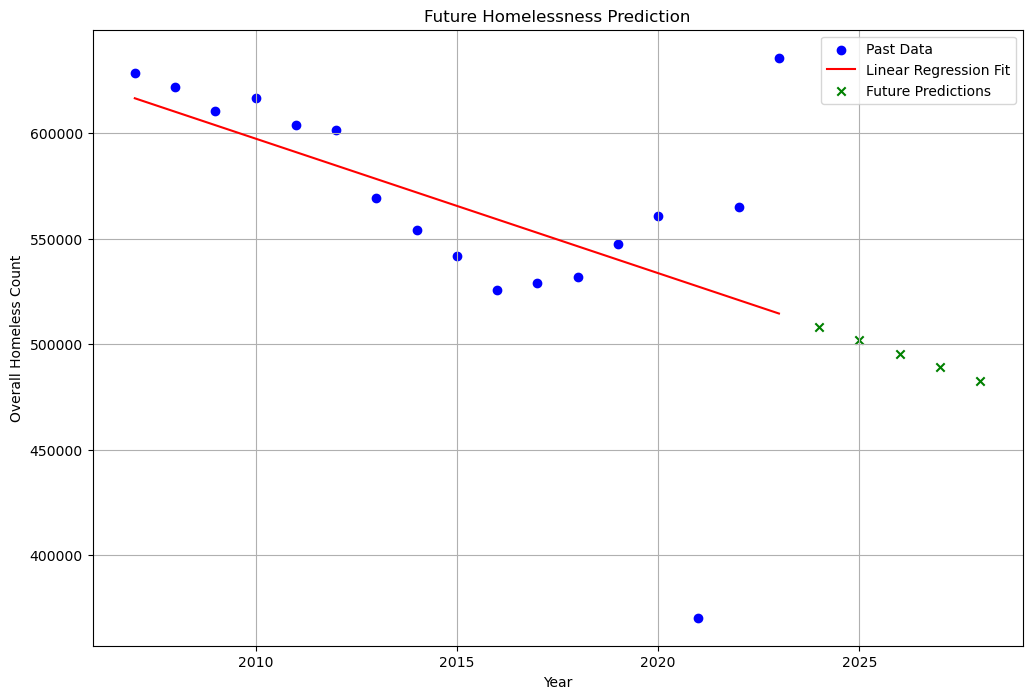

In [20]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Past Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Fit')
plt.scatter(future_years, future_predictions, color='green', label ='Future Predictions', marker='x')
plt.title("Future Homelessness Prediction")
plt.xlabel("Year")
plt.ylabel("Overall Homeless Count")
plt.grid(True)
plt.legend()
plt.show()




In [14]:
new_df = combined_df[['State', 'Overall Homeless', 'Year']]

In [15]:
new_df_with_dummies = pd.get_dummies(new_df, columns=['State'])

In [16]:
X = new_df_with_dummies.drop('Overall Homeless', axis=1)
y = new_df_with_dummies['Overall Homeless']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

R-squared: 0.9466566510195004
RMSE: 3653.5537060380557


c:\Users\scott_p9qjqkt\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


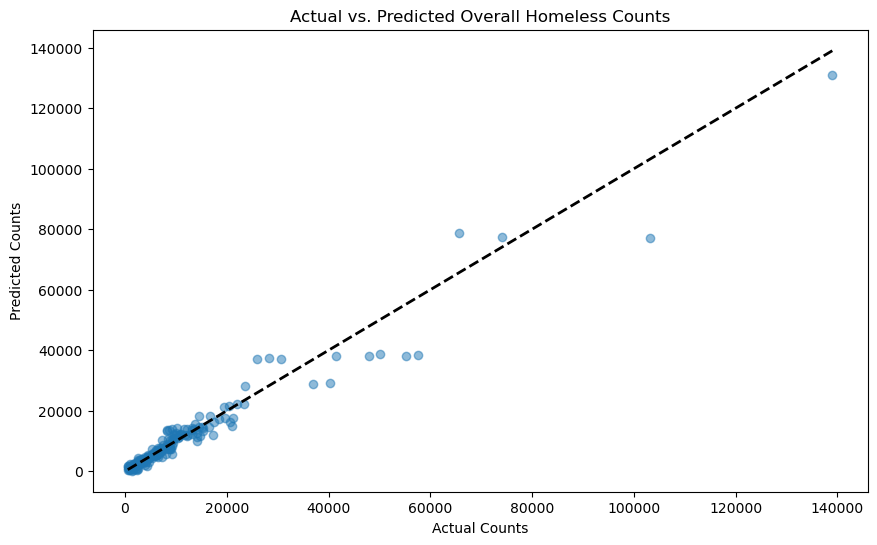

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Overall Homeless Counts')
plt.xlabel('Actual Counts')
plt.ylabel('Predicted Counts')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()